In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [211]:
def dataGen(m, n, theta) :

    data = np.concatenate((np.ones((n,1)), np.random.random((n, m-1))*2 - 1), axis=1)
    beta = np.random.random((m, 1))*2 - 1
    z = np.matmul(data, beta)
    y = np.array([])

    for i in range(n) :
        if z[i][0] > 0 : y = np.append(y, 1)
        else : y = np.append(y, 0)

    # y = y.reshape((n, 1))

    noise = np.array([np.random.binomial(1, theta) for i in range(n)])
    # print(y, noise)

    y = (np.add(y, noise)%2).reshape((n, 1))

    return data, beta, y


def lr(m, n, k, t, l):

    data, beta, y = dataGen(m, n, theta)

    beta_pred = np.random.random((m, 1))*2 - 1

    cost_previous = 0
    itr = 0
    costs = 0

    for i in range(k):
        ypred = 1/(1 + np.exp(-np.matmul(data, beta_pred)))
        # print(data, beta_pred, np.dot(data, beta_pred), np.matmul(data, beta_pred))
        beta_pred = beta_pred - ((l/n) * np.matmul(data.T, (ypred - y)))
        # print(beta_pred)
        y, ypred = y.reshape(n), ypred.reshape(n)
        cost_current = (-1/n) * (np.dot(y, np.log(ypred)) + np.dot((1 - y), np.log(1 - ypred)))
        # print(cost_current)
        y, ypred = y.reshape(n,1), ypred.reshape(n,1)
        if abs(cost_current - cost_previous) < t :
            break
        cost_previous = cost_current
        # costs = np.append(costs, cost_current)
        itr += 1
        # print(itr, end='\r')
    
    return data, y, ypred, beta, itr, beta_pred, cost_current


m = 3
n = 10
theta = 0
k = 1000000
t = 0.0000001
l = 0.0001

# data, beta, y = dataGen(m, n, theta)

# print("\nX:\n", data)
# print("\nY:\n", y)
# print("\nβ (original):\n", beta)

data, y, ypred, beta, itr, beta_pred, cost_current = lr(m, n, k, t, l)
print("\nβ (original):\n", beta)
print("\nβ (estimated):\n", beta_pred.T[0])
print(f"\nIt took {itr} iterations and cost is {cost_current}\n")


# p, e = ypred.flatten(), y.flatten()
# n = len(ypred)
# print(1-sum([abs(p[i]-e[i])/e[i] for i in range(n) if e[i] != 0])/n)

# h = plt.figure('Verification')
# plt.plot(range(itr), costs, color='b')
# h.show()





β (original):
 [[-0.79519234]
 [ 0.31348135]
 [ 0.89308087]]

β (estimated):
 [-3.38547761  0.38334124 -0.35884174]

It took 305692 iterations and cost is 0.031865891441140645

1.0


In [215]:
dp = 10

ns = np.linspace(5, 1000, dp).astype(int)
thetas = np.linspace(0, 1, dp)
itrs = np.array([])

m = 3

k = 1000000
t = 0.000001
l = 0.0001

ns, thetas = np.meshgrid(ns, thetas, indexing='ij')

p = 0

for i in range(dp):
    for j in range(dp):
        itr = lr(m, ns[i,j], k, t, l)[4]
        itrs = np.append(itrs, itr)
        p += 1
        print(f"Progress: {p}/{dp**2}", end="\r")

        
np.savetxt('data.txt', (ns.flatten(), thetas.flatten(), itrs.flatten()))


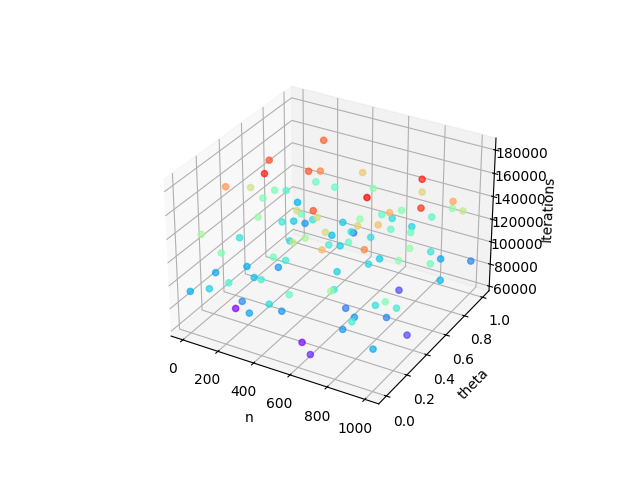

In [216]:
%matplotlib ipympl

ns, thetas, itrs = np.genfromtxt('data.txt')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(ns, thetas, itrs, c=itrs, cmap='rainbow', alpha=0.7)
ax.set_xlabel('n')
ax.set_ylabel('theta')
ax.set_zlabel('Iterations')

# xx = np.linspace(5, 100, 1000)
# yy = np.linspace(2, 0.1, 1000)
# xx, yy = np.meshgrid(xx, yy)

# ax.plot_surface(xx, 2-yy, 125000/(xx*yy), color='white', alpha=0.7)

plt.show()